In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import gymnasium as gym
from mani_skill.utils import gym_utils
from mani_skill.utils.wrappers.flatten import FlattenActionSpaceWrapper
from mani_skill.utils.wrappers.record import RecordEpisode
from mani_skill.vector.wrappers.gymnasium import ManiSkillVectorEnv
from dataclasses import dataclass
import numpy as np

In [2]:
import json

with open('zero_pad.json', 'r') as f:
    zero_pad = json.load(f)
with open('last_pad.json', 'r') as f:
    last_pad = json.load(f)
with open('clear_pad.json', 'r') as f:
    clear_pad = json.load(f)
with open('no_pad.json', 'r') as f:
    no_pad = json.load(f)            

In [4]:
z_m = [np.mean(sublist) for sublist in zero_pad]
l_m = [np.mean(sublist) for sublist in last_pad]
cl_m = [np.mean(sublist) for sublist in clear_pad]
no_m = [np.mean(sublist) for sublist in no_pad]

# z_s = [np.std(sublist)*0.5 for sublist in zero_pad]
# l_s = [np.std(sublist)*0.5 for sublist in last_pad]
# cl_s = [np.std(sublist)*0.5 for sublist in clear_pad]
# no_s = [np.std(sublist)*0.5 for sublist in no_pad]

z_s = [np.std(sublist)/np.sqrt(3) for sublist in zero_pad]
l_s = [np.std(sublist)/np.sqrt(3) for sublist in last_pad]
cl_s = [np.std(sublist)/np.sqrt(3) for sublist in clear_pad]
no_s = [np.std(sublist)/np.sqrt(3) for sublist in no_pad]

In [5]:
z_m[9] = 0.3

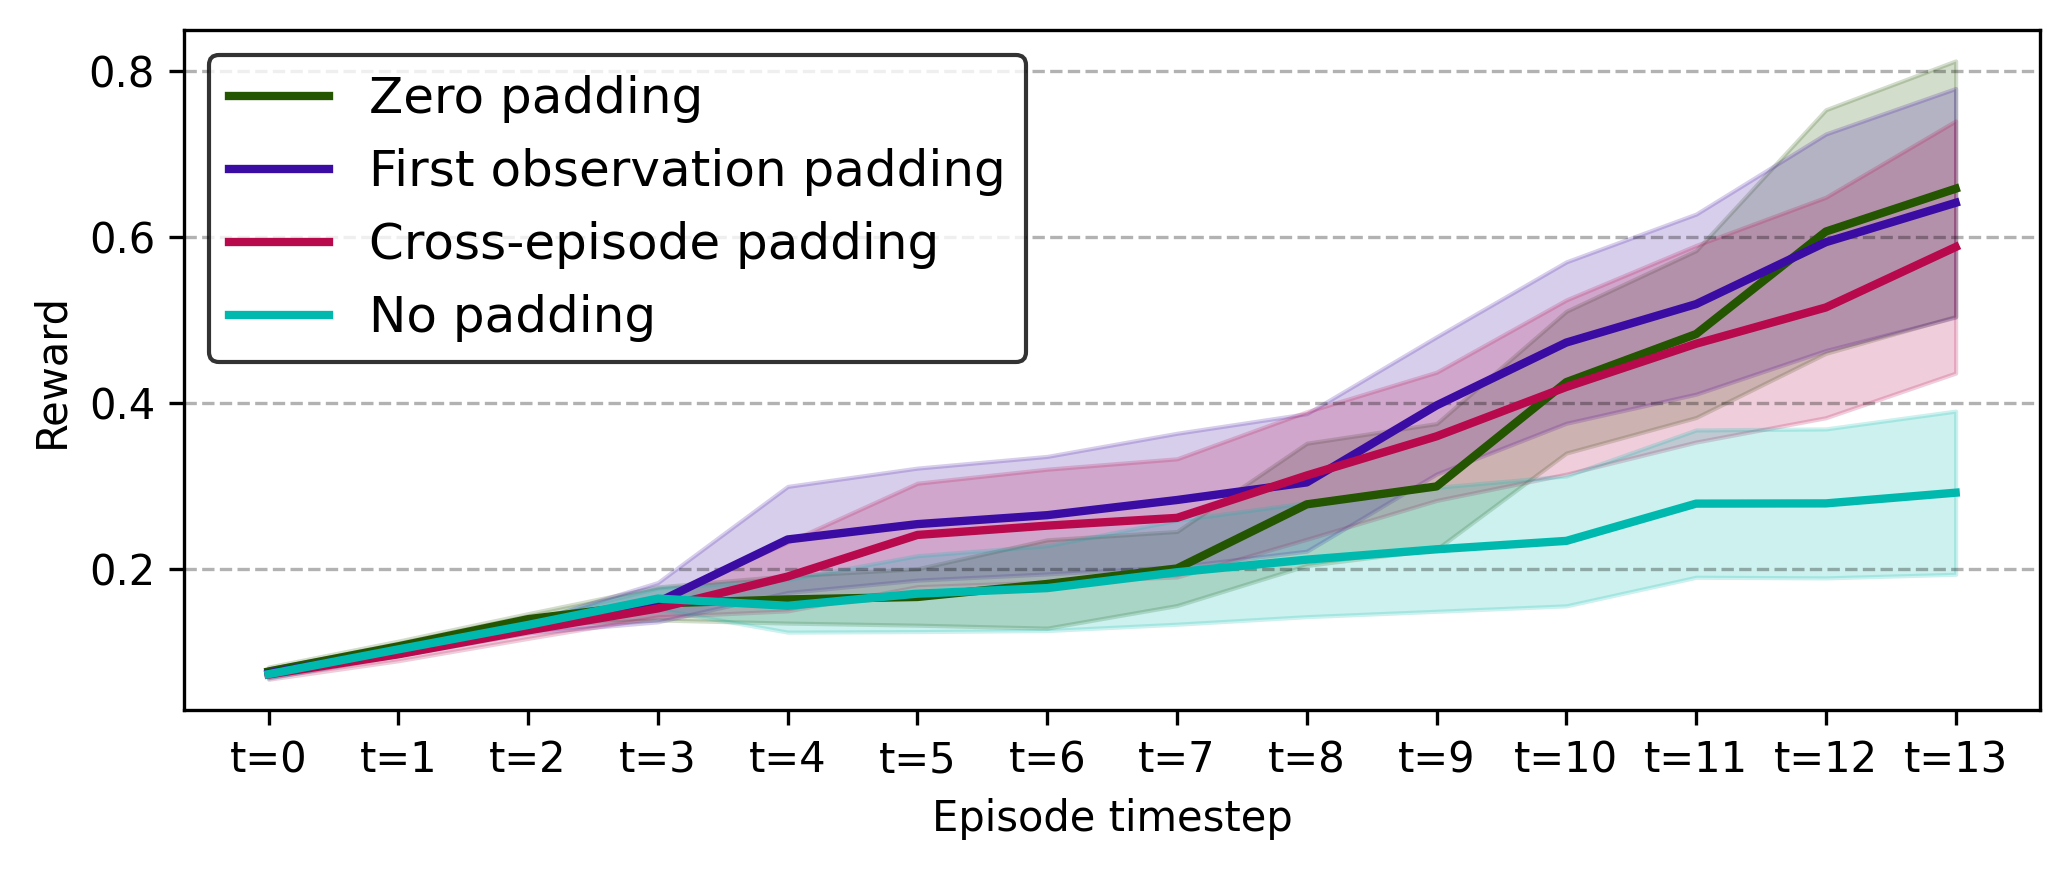

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np

# Данные для оси X (длины эпизодов)
episodes = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])

# Корректировка данных
z = np.array(z_m[:14])
l = np.array(l_m[:14])
cl = np.array(cl_m[:14])
no = np.array(no_m[:14])

z_std = np.array(z_s[:14])
l_std = np.array(l_s[:14])
cl_std = np.array(cl_s[:14])
no_std = np.array(no_s[:14])

#no[4:11] -= 0.03  # Сдвиг значений

# Настройка графика
plt.figure(figsize=(7, 3), dpi=300)

plt.plot(episodes, z, label="Zero padding", color='#245501', linewidth=2.0)
plt.fill_between(episodes, z - z_std, z + z_std, color='#245501', alpha=0.2)

plt.plot(episodes, l, label="First observation padding", color='#3a0ca3', linewidth=2.0)
plt.fill_between(episodes, l - l_std, l + l_std, color='#3a0ca3', alpha=0.2)

plt.plot(episodes, cl, label="Cross-episode padding", color='#b7094c', linewidth=2.0)
plt.fill_between(episodes, cl - cl_std, cl + cl_std, color='#b7094c', alpha=0.2)

plt.plot(episodes, no, label="No padding", color='#00b9ae', linewidth=2.0)
plt.fill_between(episodes, no - no_std, no + no_std, color='#00b9ae', alpha=0.2)

plt.grid(axis='y', color='black', linestyle='--', alpha=0.3)

# Подписи осей без жирного начертания
plt.xlabel('Episode timestep', color='black')
plt.ylabel('Reward', color='black')

# Белый фон
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

# Метки осей без жирного начертания
plt.xticks(ticks=episodes, labels=[f"t={t}" for t in episodes], color='black')
plt.yticks(color='black')

# Легенда без жирного начертания
plt.legend(loc='best', facecolor='white', edgecolor='black', fontsize=12)

plt.tight_layout()
plt.show()


In [29]:
no

array([0.07378485, 0.1036528 , 0.13309632, 0.16484999, 0.18617532,
       0.15079597, 0.15749463, 0.17659092, 0.19175845, 0.20423702,
       0.21436752])

/tmp/ipykernel_275531/953639813.py:50: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.0)


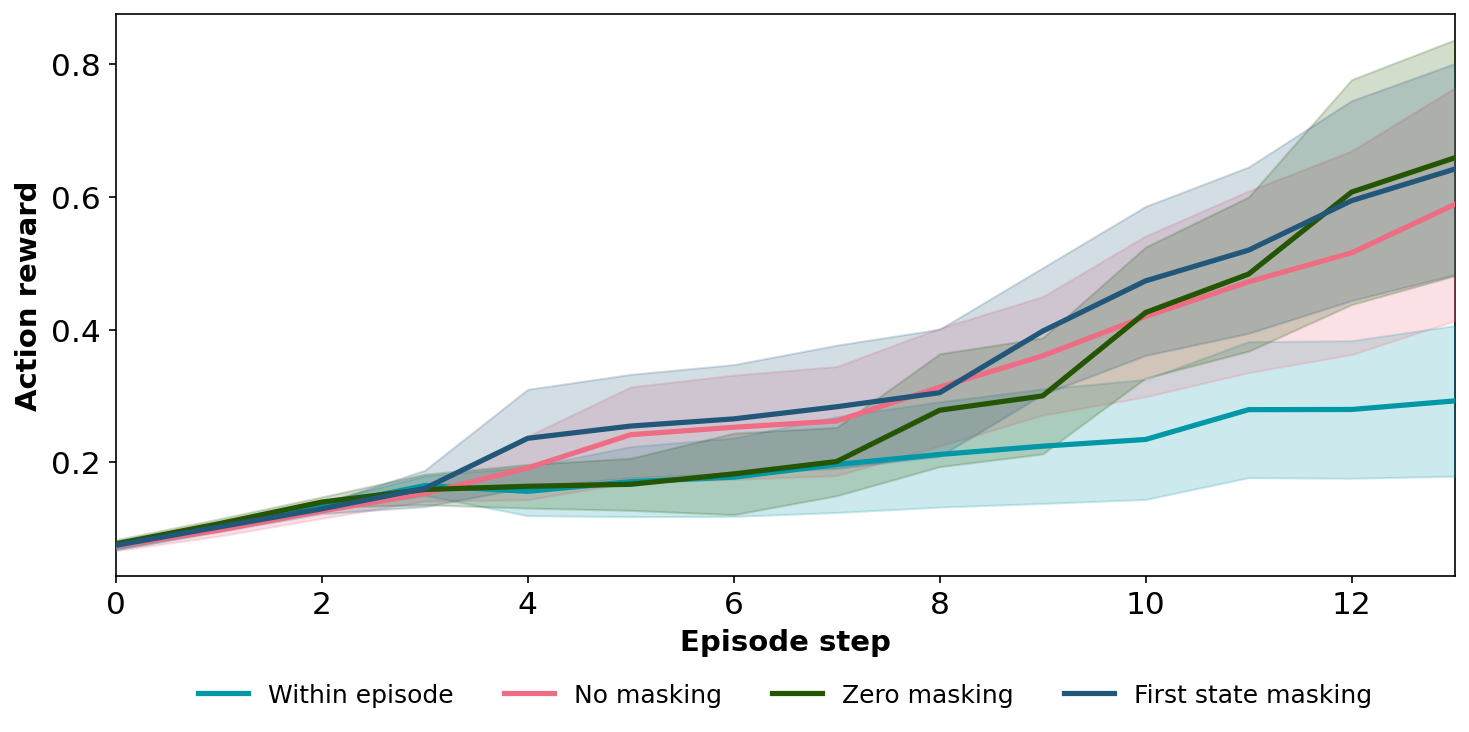

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Цветовая палитра
colors = ['#245501', '#22577A', '#EE6D84', '#0097A6']

# Стиль
linewidth = 2.5
fill_alpha = 0.2

# Данные
episodes = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

z = np.array(z_m[:14])
l = np.array(l_m[:14])
cl = np.array(cl_m[:14])
no = np.array(no_m[:14])

z_std = np.array(z_s[:14])
l_std = np.array(l_s[:14])
cl_std = np.array(cl_s[:14])
no_std = np.array(no_s[:14])

no[4:11] -= 0.03  # Корректировка

# Фигура
plt.figure(figsize=(10, 5), dpi=150)

plt.plot(episodes, no, label="Within episode", color=colors[3], linewidth=linewidth, zorder=5)
plt.fill_between(episodes, no - no_std, no + no_std, color=colors[3], alpha=fill_alpha, zorder=3)

plt.plot(episodes, cl, label="No masking", color=colors[2], linewidth=linewidth, zorder=5)
plt.fill_between(episodes, cl - cl_std, cl + cl_std, color=colors[2], alpha=fill_alpha, zorder=3)

plt.plot(episodes, z, label="Zero masking", color=colors[0], linewidth=linewidth, zorder=5)
plt.fill_between(episodes, z - z_std, z + z_std, color=colors[0], alpha=fill_alpha, zorder=3)

plt.plot(episodes, l, label="First state masking", color=colors[1], linewidth=linewidth, zorder=5)
plt.fill_between(episodes, l - l_std, l + l_std, color=colors[1], alpha=fill_alpha, zorder=3)





# Оформление осей
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))
ax.tick_params(axis='both', labelsize=15)
ax.grid(False, alpha=0.0)

plt.xlabel('Episode step', fontsize=14, weight='bold')
plt.ylabel('Action reward', fontsize=14, weight='bold')

plt.xlim(episodes[0], episodes[-1])

# Легенда под графиком в одну строку
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='white'
)

plt.tight_layout()
plt.show()


In [ ]:
z_m = [np.mean(sublist) for sublist in zero_pad]
l_m = [np.mean(sublist) for sublist in last_pad]
cl_m = [np.mean(sublist) for sublist in clear_pad]
no_m = [np.mean(sublist) for sublist in no_pad]

z_s = [np.std(sublist)*0.5 for sublist in zero_pad]
l_s = [np.std(sublist)*0.5 for sublist in last_pad]
cl_s = [np.std(sublist)*0.5 for sublist in clear_pad]
no_s = [np.std(sublist)*0.5 for sublist in no_pad]

In [9]:
import copy

In [3]:
env_kwargs = dict(obs_mode="state", render_mode="rgb_array", sim_backend="gpu")
env_kwargs["control_mode"] = "pd_ee_delta_pos"
evaluate = True
#envs = gym.make('PickCube-v1', num_envs=15 if not evaluate else 1, reconfiguration_freq=1, **env_kwargs)
eval_envs = gym.make('PickCube-v1', num_envs=15, reconfiguration_freq=1, human_render_camera_configs=dict(shader_pack="default"), **env_kwargs)

In [17]:
obs, _  = eval_envs.reset()

In [21]:
sim_state = eval_envs.get_state()

In [23]:
sim_state.shape

torch.Size([15, 70])

In [24]:
obs

tensor([[-2.5322e-04,  4.2670e-01,  2.7839e-03, -1.9383e+00, -1.1081e-02,
          2.3809e+00,  7.5535e-01,  4.0000e-02,  4.0000e-02,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0186e-02,
          7.2193e-04,  1.6146e-01,  3.3849e-03,  9.9976e-01,  2.0139e-02,
          7.8805e-03, -2.0517e-02, -7.4943e-02,  2.6779e-01, -2.9011e-03,
         -2.0393e-02,  2.0000e-02,  3.8265e-01,  0.0000e+00,  0.0000e+00,
          9.2389e-01, -1.3087e-02, -2.1115e-02, -1.4146e-01, -1.7616e-02,
         -5.4549e-02,  2.4779e-01],
        [ 3.7885e-03,  3.6675e-01,  1.9343e-03, -1.9868e+00,  8.9986e-03,
          2.3211e+00,  8.1086e-01,  4.0000e-02,  4.0000e-02,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.3112e-02,
          4.3230e-03,  1.7296e-01, -3.3358e-03,  9.9978e-01, -1.3049e-02,
  

In [25]:
eval_envs.set_state(sim_state)

/home/daniil/anaconda3/envs/rate/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.set_state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.set_state` for environment variables or `env.get_wrapper_attr('set_state')` that will search the reminding wrappers.
  logger.warn(


In [ ]:
class ConfidenceFunction(nn.Module):
    def __init__(self, state_dim, hidden_dim=128):
        """
        state_dim: размерность наблюдения s
        hidden_dim: размер скрытых слоёв сети
        """
        super().__init__()
        self.confidence_net = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # гарантирует alpha(s) ∈ (0, 1)
        )

    def forward(self, agent_action, expert_action, state):
        """
        agent_action: [B, act_dim] — действия агента
        expert_action: [B, act_dim] — действия эксперта
        state: [B, state_dim] — наблюдение

        Возвращает: blended_action = alpha * agent_action + (1 - alpha) * expert_action
        """
        alpha = self.confidence_net(state)  # [B, 1]
        # Расширим размерность для broadcast при действии
        alpha = alpha.view(-1, 1)

        blended_action = alpha * agent_action + (1 - alpha) * expert_action
        return blended_action, alpha

In [38]:
state = torch.Tensor(1,15)
a = torch.Tensor(1,20)
a_hat = torch.Tensor(1,20)

In [39]:
g = ConfidenceBlender(15, 128)

In [40]:
blended_action, alpha = g(a, a_hat, state)

In [41]:
alpha

tensor([[0.]], grad_fn=<ViewBackward0>)

In [1]:
a = [1,2,3,4,5,6][-5:]

In [2]:
env_kwargs = dict(obs_mode="state", render_mode="rgb_array", sim_backend="gpu")
envs = gym.make('PickCube-v1', num_envs=5, reconfiguration_freq=None, **env_kwargs)

NameError: name 'gym' is not defined

In [5]:
import sys
print(sys.executable)

/home/daniil/anaconda3/envs/rate/bin/python


In [ ]:
def smart_slice(observations, context, elapsed_steps, for_rb):
    """Возвращает срез observations с паддингом при недостатке шагов."""
    num_envs, seq_len, state_dim = observations.shape
    
    observations2RB = []
    next_observations2RB = []

    if seq_len >= context:
        for env_index in range(num_envs):
            if env_index in tracker.step_counts.keys(): # если эта среда нуждается в аккуратном срезе
                steps_since_reset = tracker.get_info(env_index)  # узнаём сколько шагов простепали после ресета
                padding_size = context - steps_since_reset       # считаем сколько шагов надо допадить
                padding = observations[env_index, -steps_since_reset, :].unsqueeze(0).repeat(padding_size, 1) # формируем паддинг
                valid_states = observations[env_index, -steps_since_reset:, :]
                next_obs = torch.cat([padding, valid_states], dim=0)  # работает если после ресета прошло мин 2 степа
                obs = torch.cat([ padding[0].unsqueeze(0), padding, valid_states[:-1,:] ], dim=0)# работает если после ресета прошло мин 2 степа
                next_observations2RB.append(next_obs)
                observations2RB.append(obs)
            elif env_index not in tracker.step_counts.keys():
                next_obs = observations[env_index, -context:, :] # всегда cont, s_d
                obs = torch.cat([ next_obs[0,:].unsqueeze(0), next_obs[:-1,:] ])   # а точно ли я должен next_obs[0,:] добавлять или надо просто другой срез сделать? 
                next_observations2RB.append(next_obs)
                observations2RB.append(obs)
        
        return torch.stack(observations2RB), torch.stack(next_observations2RB)    
    
    else:                
        padding_size = context - seq_len
        padding = observations[:, 0, :].unsqueeze(1).repeat(1, padding_size, 1)  # паддинг первым состоянием

        
        next_obs = torch.cat([padding, observations], dim=1)

        obs = torch.cat([
                observations[:, 0, :].unsqueeze(1),  # начальное состояние
                padding,
                observations[:,:-1, :]
            ], dim=1)

    return obs, next_obs

In [ ]:
def smart_slice(observations, context, elapsed_steps, for_rb=True):
    num_envs, seq_len, state_dim = observations.shape
    
    observations2RB = []
    next_observations2RB = []
    
    if for_rb: # если режем для rb
        for env_index in range(num_envs): # пробегаем по средам
            
            steps_since_reset = elapsed_steps[env_index]
            if steps_since_reset >= context:  # этого условия достаточно что бы без пад-гов сделать s и s'
                obs = observations[env_index, -context-1:-1, :]
                next_obs = observations[env_index, -context:, :]
            
            elif 0 < steps_since_reset < context:                
                padding_size = context - steps_since_reset 
                padding = observations[env_index, -steps_since_reset-1, :].unsqueeze(0).repeat(padding_size, 1) 
                valid_states = observations[env_index, -steps_since_reset-1:, :]
                intermediate_obs = torch.cat([padding, valid_states], dim=0) 
                obs = intermediate_obs[env_index, -context-1:-1, :]
                next_obs = intermediate_obs[env_index, -context:, :]
            
            elif  steps_since_reset == 0:  # это обманка, на самом деле мы не начали с нового сост-я а видим 51й кадр
                obs = observations[env_index, -context-1:-1, :]
                next_obs = observations[env_index, -context:, :]
                
            observations2RB.append(obs)
            next_observations2RB.append(next_obs)  
            
        return torch.stack(observations2RB), torch.stack(next_observations2RB)
                
    if not for_rb:
        for env_index in range(num_envs): # пробегаем по средам
            
            steps_since_reset = elapsed_steps[env_index]
            if steps_since_reset >= context-1:                  # самый позитивый сценарий, просто нарезаем и не паримся
                next_obs = observations[env_index, -context:, :]
                
            elif steps_since_reset < context-1: 
                padding_size = context - steps_since_reset - 1
                padding = observations[env_index, -steps_since_reset-1, :].unsqueeze(0).repeat(padding_size, 1)
                valid_states = observations[env_index, -steps_since_reset-1:, :]
                next_obs = torch.cat([padding, valid_states], dim=0)
             
            next_observations2RB.append(next_obs)
        
        return torch.stack(next_observations2RB)
                
            

SyntaxError: invalid syntax (3715526329.py, line 9)

In [357]:
[1].append()

TypeError: list.append() takes exactly one argument (0 given)

In [353]:
data = [0]   # interm=[0,0,0,0,1]   s=[0,0,0,0,1] s'=[0,0,0,1,2]
c = 5
ssr = 0
padding_size = c - ssr - 1

padding = data[-ssr-1]
valid_states = data[-ssr-1:]


In [356]:
valid_states

[0]

In [352]:
valid_states

[0, 1, 2, 3]

In [347]:
padding

0

In [12]:
env_kwargs = dict(obs_mode="state", render_mode="rgb_array", sim_backend="gpu")
env_kwargs["control_mode"] = "pd_joint_delta_pos"
    
envs = gym.make('PickCube-v1', num_envs=2, reconfiguration_freq=None, **env_kwargs)

In [13]:
envs = ManiSkillVectorEnv(envs, num_envs=2, ignore_terminations=True, record_metrics=True)

In [184]:
envs.reset()

(tensor([[ 1.1150e-02,  4.0779e-01, -2.2373e-02, -1.9569e+00,  1.8996e-02,
           2.3441e+00,  8.0386e-01,  4.0000e-02,  4.0000e-02,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.2717e-03,
          -5.5752e-03,  1.6226e-01, -2.2465e-03,  9.9973e-01, -2.0674e-02,
          -1.0255e-02,  3.7426e-02, -5.1588e-02,  2.8513e-02,  3.6168e-02,
           7.2479e-03,  2.0000e-02,  9.9970e-01,  0.0000e+00,  0.0000e+00,
           2.4371e-02,  3.8440e-02,  1.2823e-02, -1.4226e-01,  1.2584e-03,
          -5.8836e-02,  8.5133e-03],
         [-1.9129e-02,  3.8696e-01, -3.2823e-02, -2.0038e+00, -7.6136e-03,
           2.3730e+00,  7.6408e-01,  4.0000e-02,  4.0000e-02,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.3633e-02,
          -3.2608e-02,  1.5825e-01,  8.4968e-03,  9.9986e-01, -

In [286]:
o, r, term, tru, info = envs.step(envs.action_space.sample())
print(info)

{'elapsed_steps': tensor([0, 0], device='cuda:0', dtype=torch.int32), 'success': tensor([False, False], device='cuda:0'), 'is_obj_placed': tensor([False, False], device='cuda:0'), 'is_robot_static': tensor([True, True], device='cuda:0'), 'is_grasped': tensor([False, False], device='cuda:0'), 'reconfigure': False, 'final_observation': tensor([[-1.6021e-01,  2.7413e-01, -1.8904e-01, -2.0245e+00, -1.7902e-01,
          2.5964e+00,  7.5553e-01,  2.9946e-02,  2.9946e-02,  1.8216e-01,
         -5.4423e-01,  5.4502e-01,  6.7879e-01,  1.3636e-01,  8.2061e-02,
         -4.2582e-01, -1.8103e-02, -1.8403e-02,  0.0000e+00, -3.2043e-03,
         -2.2896e-01,  2.4953e-01,  1.0838e-01,  9.8215e-01, -8.1450e-02,
          1.3042e-01,  8.4882e-02,  5.3333e-02,  6.1865e-02,  4.0793e-02,
          2.2261e-02,  2.0000e-02,  5.0411e-02,  5.4773e-06,  2.2165e-06,
         -9.9873e-01,  4.3997e-02,  2.5122e-01, -2.2953e-01,  4.4089e-02,
          3.1072e-02,  4.1865e-02],
        [ 5.1923e-02,  2.5373e-01,  

In [288]:
tru

tensor([True, True], device='cuda:0')

In [289]:
tru | term

tensor([True, True], device='cuda:0')

In [28]:
flag = False
t = 1
while not flag:
    obs = envs.step(envs.action_space.sample())
    t += 1
    flag = obs[3].item()


51

In [14]:
obs[-1]['elapsed_steps'].item()

1

In [19]:
obs[3].item()

False

In [30]:
env_kwargs = dict(obs_mode="state", render_mode="rgb_array", sim_backend="gpu")
env_kwargs["control_mode"] = "pd_joint_delta_pos"
    
envs = gym.make('PickCube-v1', num_envs=50, reconfiguration_freq=None, **env_kwargs)

rb = ReplayBuffer(envs , 50, contex, 1000000, 'cuda', 'cuda')

rb.pos = 1000

/home/daniil/anaconda3/envs/rate/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.single_observation_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.single_observation_space` for environment variables or `env.get_wrapper_attr('single_observation_space')` that will search the reminding wrappers.
  logger.warn(
/home/daniil/anaconda3/envs/rate/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.single_action_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.single_action_space` for environment variables or `env.get_wrapper_attr('single_action_space')` that will search the reminding wrappers.
  logger.warn(


In [ ]:
batch = rb.sample(512)

batch.obs.shape, batch.next_obs.shape, batch.actions.shape , batch.rewards.shape , batch.dones.shape


(torch.Size([512, 10, 42]),
 torch.Size([512, 10, 42]),
 torch.Size([512, 8]),
 torch.Size([512]),
 torch.Size([512]))

In [28]:
contex = 10

In [33]:
obs = torch.zeros(50,contex,42)
next_obs = torch.zeros(50,contex,42)
actions = torch.zeros(50,8)
rewards = torch.zeros(50)
dones = torch.zeros(50)

In [34]:
rb.add(obs, next_obs, actions, rewards, dones)

In [7]:
LOG_STD_MAX = 2
LOG_STD_MIN = -5


class Actor(nn.Module):
    def __init__(self, env):
        super().__init__()
        self.backbone = nn.Sequential(
            nn.Linear(np.array(env.single_observation_space.shape).prod(), 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
        )
        self.fc_mean = nn.Linear(256, np.prod(env.single_action_space.shape))
        self.fc_logstd = nn.Linear(256, np.prod(env.single_action_space.shape))
        # action rescaling
        h, l = env.single_action_space.high, env.single_action_space.low
        self.register_buffer("action_scale", torch.tensor((h - l) / 2.0, dtype=torch.float32))
        self.register_buffer("action_bias", torch.tensor((h + l) / 2.0, dtype=torch.float32))
        # will be saved in the state_dict

    def forward(self, x):
        x = self.backbone(x)
        mean = self.fc_mean(x)
        log_std = self.fc_logstd(x)
        log_std = torch.tanh(log_std)
        log_std = LOG_STD_MIN + 0.5 * (LOG_STD_MAX - LOG_STD_MIN) * (log_std + 1)  # From SpinUp / Denis Yarats

        return mean, log_std

    def get_eval_action(self, x):
        x = self.backbone(x)
        mean = self.fc_mean(x)
        action = torch.tanh(mean) * self.action_scale + self.action_bias
        return action

    def get_action(self, x):
        mean, log_std = self(x)
        std = log_std.exp()
        normal = torch.distributions.Normal(mean, std)
        x_t = normal.rsample()  # for reparameterization trick (mean + std * N(0,1))
        y_t = torch.tanh(x_t)
        action = y_t * self.action_scale + self.action_bias
        log_prob = normal.log_prob(x_t)
        # Enforcing Action Bound
        log_prob -= torch.log(self.action_scale * (1 - y_t.pow(2)) + 1e-6)
        log_prob = log_prob.sum(1, keepdim=True)
        mean = torch.tanh(mean) * self.action_scale + self.action_bias
        return action, log_prob, mean

    def to(self, device):
        self.action_scale = self.action_scale.to(device)
        self.action_bias = self.action_bias.to(device)
        return super().to(device)

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, dim, device, min_timescale=2.0, max_timescale=1e4):
        super().__init__()
        self.device = device
        freqs = torch.arange(0, dim, min_timescale).to(self.device)
        inv_freqs = max_timescale ** (-freqs / dim)
        self.register_buffer("inv_freqs", inv_freqs)

    def forward(self, seq_len):
        seq = torch.arange(seq_len - 1, -1, -1.0).to(self.device)
        sinusoidal_inp = rearrange(seq, "n -> n ()") * rearrange(self.inv_freqs, "d -> () d")
        pos_emb = torch.cat((sinusoidal_inp.sin(), sinusoidal_inp.cos()), dim=-1)
        return pos_emb

#######################################################################################################################################
##########################################################  Gatings  #################################################################

class GRUGate(nn.Module):

    def __init__(self, input_dim: int, bg: float = 0.0):
        
        super(GRUGate, self).__init__()
        self.Wr = nn.Linear(input_dim, input_dim, bias=False)
        self.Ur = nn.Linear(input_dim, input_dim, bias=False)
        self.Wz = nn.Linear(input_dim, input_dim, bias=False)
        self.Uz = nn.Linear(input_dim, input_dim, bias=False)
        self.Wg = nn.Linear(input_dim, input_dim, bias=False)
        self.Ug = nn.Linear(input_dim, input_dim, bias=False)
        self.bg = nn.Parameter(torch.full([input_dim], bg))  # bias
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        nn.init.xavier_uniform_(self.Wr.weight)
        nn.init.xavier_uniform_(self.Ur.weight)
        nn.init.xavier_uniform_(self.Wz.weight)
        nn.init.xavier_uniform_(self.Uz.weight)
        nn.init.xavier_uniform_(self.Wg.weight)
        nn.init.xavier_uniform_(self.Ug.weight)

    def forward(self, x: torch.Tensor, y: torch.Tensor):
        """        
        Arguments:
            x {torch.tensor} -- First input
            y {torch.tensor} -- Second input
        Returns:
            {torch.tensor} -- Output
        """
        r = self.sigmoid(self.Wr(y) + self.Ur(x))
        z = self.sigmoid(self.Wz(y) + self.Uz(x) - self.bg)
        h = self.tanh(self.Wg(y) + self.Ug(torch.mul(r, x)))

        # print(f'mean z: {z.mean()}')

        return torch.mul(1 - z, x) + torch.mul(z, h) #, z.mean()

#######################################################################################################################################
######################################################## nano gpt modification ########################################################

class LayerNorm(nn.Module):
    """ LayerNorm but with an optional bias. PyTorch doesn't support simply bias=False """

    def __init__(self, ndim, bias):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = nn.Parameter(torch.zeros(ndim)) if bias else None

    def forward(self, input):
        return F.layer_norm(input, self.weight.shape, self.weight, self.bias, 1e-5)


class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        # regularization
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.dropout = config.dropout
        # flash attention make GPU go brrrrr but support is only in PyTorch >= 2.0
        self.flash = hasattr(torch.nn.functional, 'scaled_dot_product_attention')
    
        if not self.flash:
            print("WARNING: using slow attention. Flash Attention requires PyTorch >= 2.0")
            # causal mask to ensure that attention is only applied to the left in the input sequence
            self.register_buffer("bias", torch.tril(torch.ones(config.num_steps, config.num_steps))
                                        .view(1, 1, config.num_steps, config.num_steps))

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        q, k, v  = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)

        # causal self-attention; Self-attend: (B, nh, T, hs) x (B, nh, hs, T) -> (B, nh, T, T)
        if self.flash:
            # efficient attention using Flash Attention CUDA kernels
            y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)
        else:
            # manual implementation of attention
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            att = att.masked_fill(self.bias[:,:,:T,:T] == 0, float('-inf'))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            y = att @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side

        # output projection
        y = self.resid_dropout(self.c_proj(y))
        return y



class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd, bias=config.bias)
        self.gelu    = nn.GELU()
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        x = self.dropout(x)
        return x


class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = LayerNorm(config.n_embd, bias=config.bias)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = LayerNorm(config.n_embd, bias=config.bias)
        self.mlp = MLP(config)

        if config.use_gates:
            self.skip_fn_1 = GRUGate(config.n_embd, 2.0)
            self.skip_fn_2 = GRUGate(config.n_embd, 2.0)
        else:
            self.skip_fn_1 = lambda x, y: x + y
            self.skip_fn_2 = lambda x, y: x + y


    def forward(self, x):

        x = self.skip_fn_1(x, self.attn(self.ln_1(x)))
        x = self.skip_fn_2(x, self.mlp(self.ln_2(x)))

        
        return x

class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()

        self.config = config
        self.pos_embedding = nn.Embedding(config.max_episode_steps, config.n_embd)

        self.transformer_layers = nn.ModuleList([Block(config) for _ in range(config.n_layer)])
        self.ln_f = LayerNorm(config.n_embd, bias=config.bias)
        self.drop = nn.Dropout(config.dropout)

        
        self.apply(self._init_weights)
        # apply special scaled init to the residual projections, per GPT-2 paper
        for pn, p in self.named_parameters():
            if pn.endswith('c_proj.weight'):
                torch.nn.init.normal_(p, mean=0.0, std=0.02/math.sqrt(2 * config.n_layer))

    

    def get_num_params(self, non_embedding=True):
        
        n_params = sum(p.numel() for p in self.parameters())
        if non_embedding:
            n_params -= self.transformer.wpe.weight.numel()
        return n_params

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, x):

        t = x.shape[1]

        device = x.device
        pos = torch.arange(0, t, dtype=torch.long, device=device) # shape (t)
        pos_emb = self.pos_embedding(pos) # position embeddings of shape (t, n_embd)
        
        x = self.drop(x + pos_emb)
        for block in self.transformer_layers:
            x = block(x)
        x = self.ln_f(x)

        return x

# ACTOR

In [ ]:
class Actor(nn.Module):
    def __init__(self, env):
        super().__init__()
        self.transformer = GPT(args)
        self.encoder = nn.Linear(np.array(env.single_observation_space.shape).prod(), 256)
        
        self.head = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
        )
        self.fc_mean = nn.Linear(256, np.prod(env.single_action_space.shape))
        self.fc_logstd = nn.Linear(256, np.prod(env.single_action_space.shape))
        # action rescaling
        h, l = env.single_action_space.high, env.single_action_space.low
        self.register_buffer("action_scale", torch.tensor((h - l) / 2.0, dtype=torch.float32))
        self.register_buffer("action_bias", torch.tensor((h + l) / 2.0, dtype=torch.float32))
        # will be saved in the state_dict

    def forward(self, x):
        x = self.encoder(x)
        x = self.transformer(x)
        x = self.head(x)
        
        mean = self.fc_mean(x)
        log_std = self.fc_logstd(x)
        log_std = torch.tanh(log_std)
        log_std = LOG_STD_MIN + 0.5 * (LOG_STD_MAX - LOG_STD_MIN) * (log_std + 1)  # From SpinUp / Denis Yarats

        return mean, log_std

    def get_eval_action(self, x):
        x = self.encoder(x)
        x = self.transformer(x)
        x = self.head(x)
        
        mean = self.fc_mean(x)
        action = torch.tanh(mean) * self.action_scale + self.action_bias
        return action

    def get_action(self, x):
        mean, log_std = self(x)
        std = log_std.exp()
        normal = torch.distributions.Normal(mean, std)
        x_t = normal.rsample()  # for reparameterization trick (mean + std * N(0,1))
        y_t = torch.tanh(x_t)
        action = y_t * self.action_scale + self.action_bias
        log_prob = normal.log_prob(x_t)
        # Enforcing Action Bound
        log_prob -= torch.log(self.action_scale * (1 - y_t.pow(2)) + 1e-6)
        log_prob = log_prob.sum(1, keepdim=True)
        mean = torch.tanh(mean) * self.action_scale + self.action_bias
        return action, log_prob, mean

    def to(self, device):
        self.action_scale = self.action_scale.to(device)
        self.action_bias = self.action_bias.to(device)
        return super().to(device)

# CRITIC


In [ ]:
class QNetwork(nn.Module):
    '''
    NIK
    '''
    
    def __init__(self, env, args, transformer):
        super().__init__()
        self.transformer = GPT(args)
        self.encoder = nn.Linear(np.array(env.single_observation_space.shape).prod(), args.n_embd)
        self.fc1 = nn.Linear(np.array(args.n_embd + np.prod(env.single_action_space.shape)), args.head_dim)
        self.fc2 = nn.Linear(args.head_dim, args.head_dim)
        self.fc3 = nn.Linear(args.head_dim, 1)

    def forward(self, x, a):
        x = self.encoder(x)
        x = self.transformer(x)[:, -1, :]

        x = torch.cat([x, a], 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class SoftQNetwork(nn.Module):
    '''
    MANI
    '''
    def __init__(self, env, args):
        super().__init__()
        
        self.net = nn.Sequential(
            nn.Linear(np.array(env.single_observation_space.shape).prod() + np.prod(env.single_action_space.shape), 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
        )

    def forward(self, x, a):
        x = torch.cat([x, a], 1)
        return self.net(x)

In [ ]:
class SoftQNetwork(nn.Module):
    '''
    Q-network for Transformer-based maniskill tasks
    '''
    def __init__(self, env, args):
        super().__init__()
        
        self.transformer = GPT(args)
        self.encoder = nn.Linear(np.array(env.single_observation_space.shape).prod(), args.n_embd)
        self.net = nn.Sequential(
            nn.Linear(args.n_embd + np.prod(env.single_action_space.shape), 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
        )

    def forward(self, x, a):                # x = (batch,cont,s_d)   a = (batch,a_d)
        x = self.encoder(x)                 # x = (batch,cont,n_embd)
        x = self.transformer(x)[:, -1, :]   # x = (batch,n_embd)
        x = torch.cat([x, a], 1)            # x = (batch,n_embd+a_d)
        return self.net(x)                  # x = (batch,1)

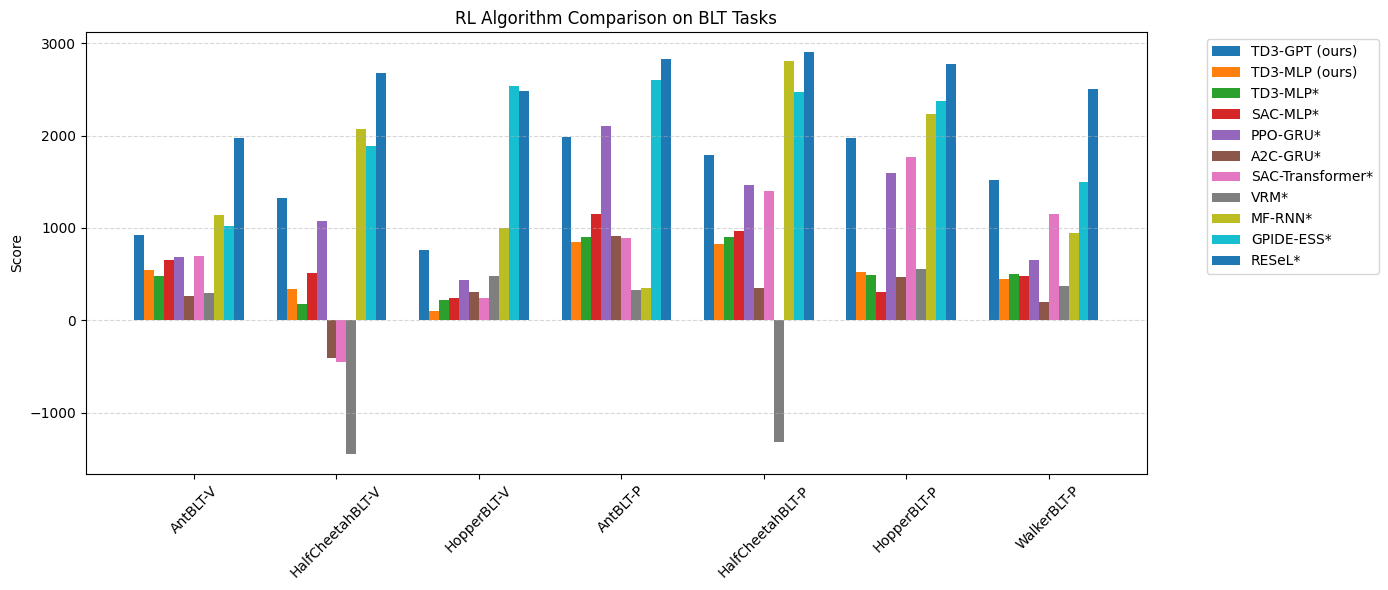

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Названия сред
envs = [
    "AntBLT-V", "HalfCheetahBLT-V", "HopperBLT-V",
    "AntBLT-P", "HalfCheetahBLT-P", "HopperBLT-P", "WalkerBLT-P"
]

# Названия алгоритмов
algos = [
    "TD3-GPT (ours)", "TD3-MLP (ours)", "TD3-MLP*", "SAC-MLP*",
    "PPO-GRU*", "A2C-GRU*", "SAC-Transformer*", "VRM*",
    "MF-RNN*", "GPIDE-ESS*", "RESeL*"
]

# Средние значения (mean) из LaTeX таблицы (без ± значения)
scores = [
    [922, 549, 476, 651, 690, 264, 692, 291, 1137, 1017, 1971],
    [1324, 343, 177, 513, 1072, -412, -449, -1443, 2073, 1886, 2678],
    [759, 98, 223, 243, 438, 301, 240, 476, 1003, 2537, 2480],
    [1984, 846, 897, 1147, 2103, 916, 894, 323, 352, 2597, 2829],
    [1788, 824, 906, 970, 1460, 353, 1400, -1317, 2802, 2466, 2900],
    [1971, 525, 490, 310, 1592, 467, 1763, 557, 2234, 2373, 2769],
    [1516, 451, 505, 483, 651, 200, 1150, 372, 940, 1502, 2505],
]

scores = np.array(scores)

# Настройки графика
num_envs = len(envs)
num_algos = len(algos)
bar_width = 0.07
x = np.arange(num_envs)

# Размер фигуры
plt.figure(figsize=(14, 6))

# Рисуем каждую группу баров
for i in range(num_algos):
    plt.bar(x + i * bar_width, scores[:, i], width=bar_width, label=algos[i])

# Настройка осей
plt.xticks(x + bar_width * (num_algos / 2), envs, rotation=45)
plt.ylabel("Score")
plt.title("RL Algorithm Comparison on BLT Tasks")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.show()